In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [148]:
df = pd.read_csv('placement.csv')

In [149]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

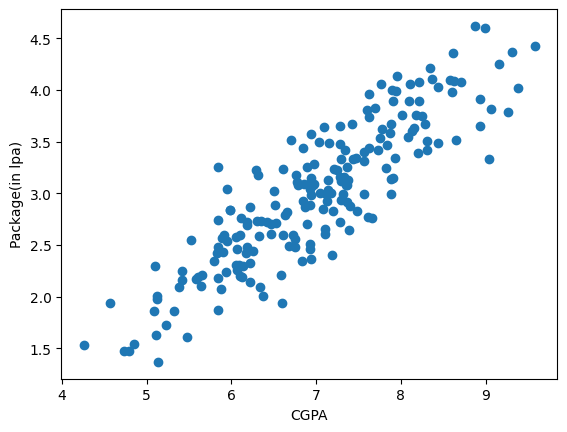

In [150]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [151]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [152]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
lr = LinearRegression()

In [156]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

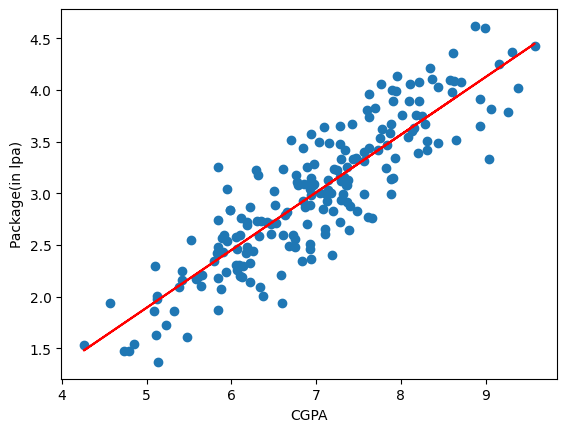

In [157]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [159]:
y_pred = lr.predict(X_test)

In [160]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [161]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [162]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [163]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [164]:
print("R2", r2_score(y_test, y_pred))

R2 0.780730147510384


In [165]:
# Adjusted R2 Score

r2 = r2_score(y_test, y_pred)
1 - ((1-r2)*(40-1) / (40-1-1))

0.7749598882343415

#### Adding a random column to see the changes in R2 score.

In [166]:
new_df1 = df.copy()

In [167]:
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.449460,3.26
1,5.12,0.492785,1.98
2,7.82,0.458431,3.25
3,7.42,0.592300,3.67
4,6.94,0.865189,3.57


Text(0, 0.5, 'Package( in LPA)')

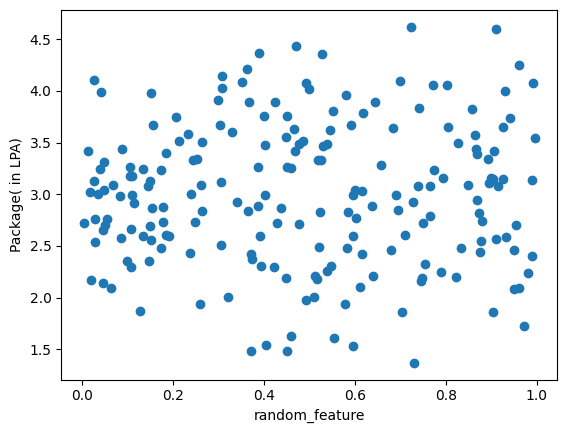

In [168]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package( in LPA)')

In [169]:
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [171]:
lr = LinearRegression()

In [172]:
lr.fit(X_train, y_train)

LinearRegression()

In [173]:
y_pred = lr.predict(X_test)

In [174]:
print("R2", r2_score(y_test, y_pred))

R2 0.780455332187155


In [175]:
# Adjusted R2 Score

r2 = r2_score(y_test, y_pred)
1 - ((1-r2)*(40-1) / (40-1-2))

0.7685880528459201

#### Adding an important column to check r2 score change

In [176]:
new_df2 = df.copy()
new_df2['iq'] = new_df1['package'] + (np.random.randint(-12, 12, 200)/10)

new_df2 = new_df2[['cgpa', 'iq', 'package']]
new_df2.head()

,cgpa,iq,package
0,6.89,3.76,3.26
1,5.12,1.68,1.98
2,7.82,4.15,3.25
3,7.42,3.27,3.67
4,6.94,3.97,3.57


Text(0, 0.5, 'Package( in LPA)')

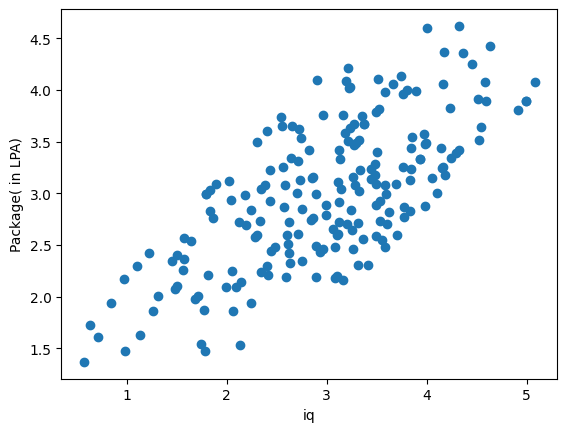

In [177]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package( in LPA)')

In [178]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [180]:
lr = LinearRegression()

In [181]:
lr.fit(X_train, y_train)

LinearRegression()

In [182]:
y_pred = lr.predict(X_test)

In [183]:
print("R2", r2_score(y_test, y_pred))

R2 0.8144127280851939


In [184]:
# Adjusted R2 Score

r2 = r2_score(y_test, y_pred)
1 - ((1-r2)*(40-1) / (40-1-2))

0.8043809836573665